### Generating a Random Process

Author:Arun Prakash A, arunprakash.ece@kongu.ac.in

 * Let us generate white gaussian noise $v(n)$ (uncorrelated process) and pass it through a filter to produce random process $x(n)$ (correlated process).
 * If the transfer function of the filter $H(z)$ is $ = \frac{1}{1-0.25z^{-1}}$
 * Then the autocorrelation of $x(n)$ will follow $r_x(k) = \frac{16}{15}(\frac{1}{4})^ku(k)$

In [1]:
import numpy as np
from scipy import signal as sig
from matplotlib import pyplot as plt

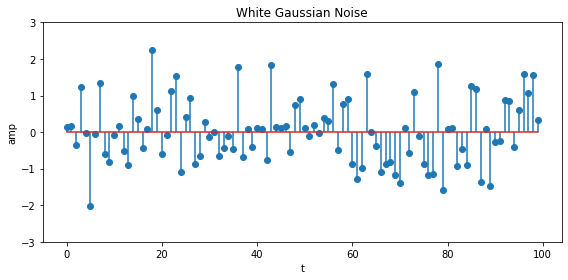

In [2]:
vn = np.random.normal(size=(100,100)) # generate 10 realizations
fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.stem(vn[:,0],use_line_collection=True)
ax.set_ylim([-3,3])
ax.set_title('White Gaussian Noise')
ax.set_xlabel('t')
ax.set_ylabel('amp')
fig.tight_layout()

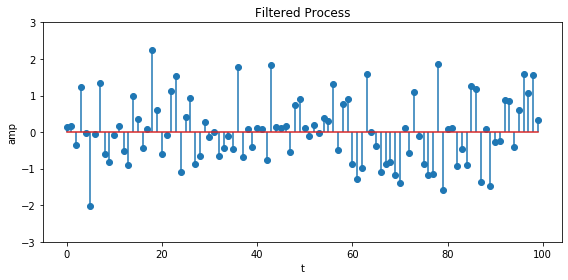

In [3]:
b=np.array([1])
a = np.array([1,-0.25])
xn = sig.lfilter(b,a,vn)
fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.stem(xn[:,0],use_line_collection=True)
ax.set_ylim([-3,3])
ax.set_title('Filtered Process')
ax.set_xlabel('t')
ax.set_ylabel('amp')
fig.tight_layout()

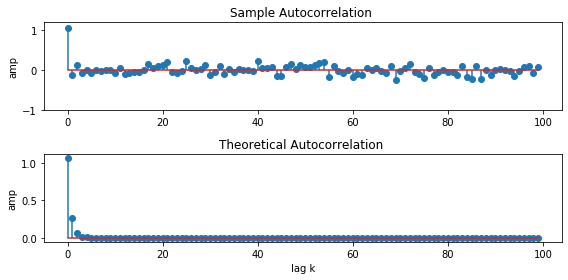

In [4]:
r_xn = np.cov(xn)[0,:]
k = np.arange(100)
rx_k = (16/15)*(0.25)**k
fig,ax = plt.subplots(2,1,figsize=(8,4))
ax[0].stem(r_xn,use_line_collection=True)
ax[0].set_ylim([-1,1.2])
ax[0].set_title('Sample Autocorrelation ')
ax[1].set_xlabel('lag k')
ax[1].stem(rx_k,use_line_collection=True)
ax[1].set_title('Theoretical Autocorrelation ')
ax[0].set_ylabel('amp')
ax[1].set_ylabel('amp')
fig.tight_layout()

**ARMA(p,q)**

 * The wold decomposition theorem states that every WSS random Process can be expressed as sum of **regular process** and **predictable process** $x(n) = x_r(n)+x_p(n)$.
 * The example transfer function that generates ARMA(2,2) process is $H(z) = \frac{2}{3} \frac{1+0.9025z^{-2}}{1-0.5562z^{-1}+0.81z^{-2}}$
 * First, Let us plot the power spectrum of white noise that is represented as an impulse in correlation domain.Therefore, it is a constant in frequency domain.
 * Then, plot the frequency response of ARMA filter.Then, Pass the white noise through the filter.
 * Plot the power spectra of output process $x(n)$ and the autocorrelation. Observe the changes and connect the dots for deeper understanding.
 

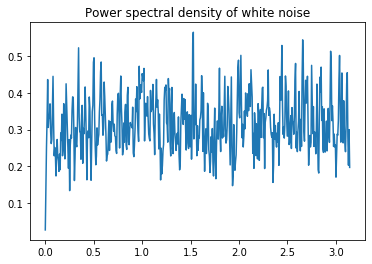

In [5]:
#plot the power spectrum using welch method (yet to study), ignore the labels
f,pxx = sig.welch(vn.flatten(),fs=2*np.pi,nperseg=1024)
plt.plot(f,pxx)
plt.title('Power spectral density of white noise')
plt.show()

Design a filter and plot the frequency response of the filter.

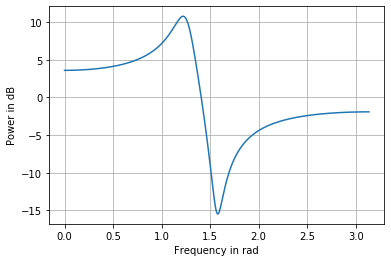

In [6]:
b = np.array([1,0,0.9])
a = np.array([1,-0.5562,0.81])
#plot the frequency response of H(z)
w,h = sig.freqz(b,a)
plt.plot(w,20*np.log10(np.abs(h)))
plt.xlabel(r'Frequency in rad')
plt.ylabel('Power in dB')
plt.grid()
plt.show()

Filter the white noise to produce the RP $x(n)$ and plot the respective spectrum and observe how it reveals the process $x(n)$ is composed of a regular process and a predictable process centered around 1.3.

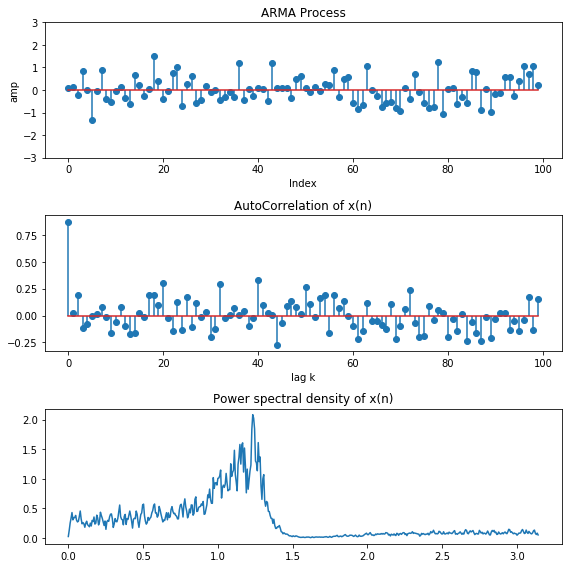

In [7]:
xn = (2/3)*sig.lfilter(b,a,vn)
fig,ax = plt.subplots(3,1,figsize=(8,8))
ax[0].stem(xn[:,0],use_line_collection=True)
ax[0].set_ylim([-3,3])
ax[0].set_title('ARMA Process')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('amp')
# autocorrelation
r_xn = np.cov(xn)[0,:]
ax[1].set_title('AutoCorrelation of x(n)')
ax[1].stem(r_xn,use_line_collection=True)
ax[1].set_xlabel('lag k')
#power spectrum
f,pxx = sig.welch(xn.flatten(),fs=2*np.pi,nperseg=1024)
ax[2].plot(f,pxx)
ax[2].set_title('Power spectral density of x(n)')
fig.tight_layout()

You might wonder what is the use of filtering white noise to produce $x(n)$. Actually, what we wish to do is the opposite. Suppose we are given with $x(n)$ (observation of any random process), how do we build a model that generates the $x(n)$ as close as possible?. How do we estimate the parameters of those models?. This lead us to the concept of **Signal Modelling** 